[[25  3]
 [ 2  9]]
Final rmse value is:  0.35805743701971643
f1 score:  0.7826086956521738
Training score:  0.7928669410150891
Accuracy score: 0.8717948717948718


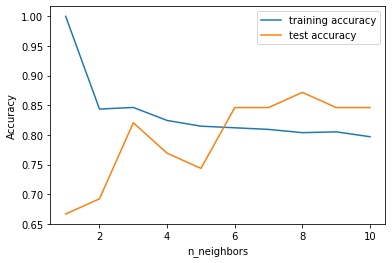

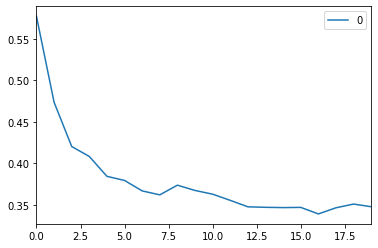

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

diabetes=pd.read_csv('diabetes.csv')
diabetes.head()

zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
for column in zero_not_accepted:
    diabetes[column]=diabetes[column].replace(0,np.NaN)
    mean=int(diabetes[column].mean(skipna=True))
    diabetes[column]=diabetes[column].replace(np.NaN,mean)

X=diabetes.iloc[:, 0:8]
y=diabetes.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.05)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
training_accuracy = []
test_accuracy = []



neighbors_settings = range(1, 11) 
for n_neighbors in neighbors_settings:
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier.fit(X_train, y_train)
    training_accuracy.append(classifier.score(X_train, y_train))
    test_accuracy.append(classifier.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

rmse_val=[]
for K in range(20):
    K=K+1;
    model=neighbors.KNeighborsRegressor(n_neighbors=K)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    error=sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
curve=pd.DataFrame(rmse_val)
curve.plot()

classifier= KNeighborsClassifier(n_neighbors=11,p=2, metric='euclidean')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
rmse=sqrt(mean_squared_error(y_test,y_pred))
print("Final rmse value is: ",rmse)
print("f1 score: ", f1_score(y_test, y_pred))
print("Training score: ",classifier.score(X_train, y_train))
print("Accuracy score:", accuracy_score(y_test, y_pred))
